In [47]:
# %pip install tensorflow

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import os

import numpy as np

from collections import Counter

import glob

[2560, 1792, 724]


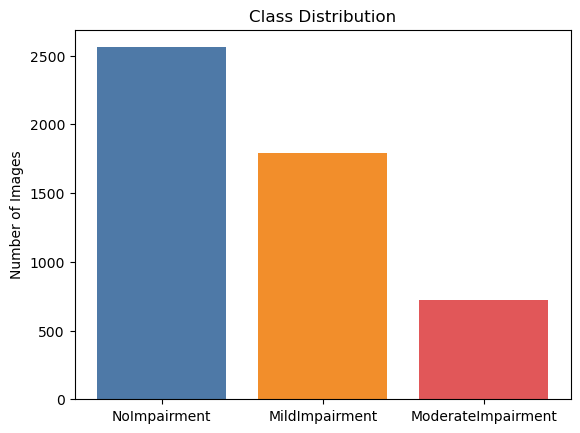

In [34]:
#Sets the base path
basepath = './data/raw'

# Our three classes
classes = ["NoImpairment", "MildImpairment", "ModerateImpairment"]
counts = []

# Loops through the classes list and creates the full path.
# Then outputs a list of all the items in the folder into 'files'.
# len() then counts the length of files, and the value is added to the counts list.

for class_name in classes:
    full_path = os.path.join(basepath, class_name)
    files = glob.glob(os.path.join(full_path, "*.jpg"))
    counts.append(len(files))


# Creates a barchart
plt.bar(classes, counts, color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title ('Class Distribution')
plt.ylabel ('Number of Images')
plt.show
print (counts)


In [43]:
train_ds = keras.utils.image_dataset_from_directory('./data/raw', subset = "training", labels='inferred', validation_split=0.2, seed = 2614)
val_data = keras.utils.image_dataset_from_directory('./data/raw', labels='inferred', subset = "validation", validation_split=0.2, seed = 2614)
print(train_data.class_names)


Found 5076 files belonging to 3 classes.
Using 4061 files for training.
Found 5076 files belonging to 3 classes.
Using 1015 files for validation.
['MildImpairment', 'ModerateImpairment', 'NoImpairment']


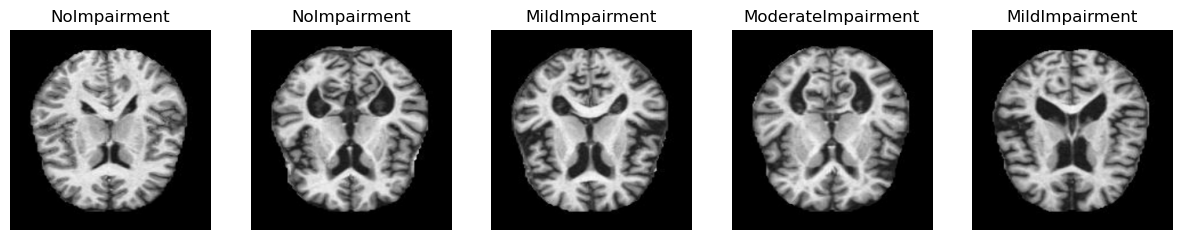

In [ ]:
# Checking that the training data is shuffled.
plt.figure(figsize=(15, 5))

# Take 1 batch (which contains 32 images and 32 labels)
# Loops through the first 5 images and labels.
for images, labels in train_data.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        # Convert tensor to standard image format.
        plt.imshow(images[i].numpy().astype("uint8"))
        # Look up the class name using the label index
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [56]:
val_batches = (len(val_data))
print (val_batches)
val_ds = val_data.take(16)
test_ds = val_data.skip(16)

32


ValueError: Attempt to convert a value (<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>) to a Tensor.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense

model = tf.keras.models.Sequential([
    Input(shape=(256, 256, 3)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dropout(rate = 0.1),
    Dense(units = 3, activation = 'softmax')

])